https://zhiyzuo.github.io/EM/

In [1]:
import numpy as np
import scipy as sp

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Introduction: Density Estimation
We start by defining a problem in the context of unsupervised learning. Suppose we have 1-dimensional data, denoted by $$\mathbf{x} = (x^{(1)}, \ldots, x^{(m)})$$ that was generated from two Gaussian distributions with a different mean but same variance, as shown below.

In [11]:
N = 100
mu_arr = np.array([1, 10])
sigma_arr = np.array([1, 1])
x = np.append(np.random.normal(mu_arr[0], sigma_arr[0], N), 
              np.random.normal(mu_arr[1], sigma_arr[1], N))
x[:10]

array([ 1.58966897,  2.1265768 , -0.33653821,  0.35932505,  1.12459757,
        1.55175995, -1.07707635,  2.34286394,  0.97851975,  1.7306396 ])

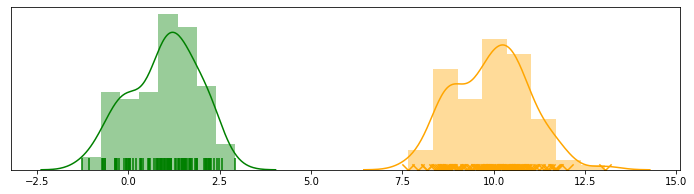

In [16]:
fig, ax = plt.subplots(figsize=(12,3))
ax.scatter(x[:N], np.zeros(N), c='green', marker=2, s=150)
ax.scatter(x[N:], np.zeros(N), c='orange', marker='x', s=150)
_ = ax.set_yticks([])
sns.distplot(x[:N], color='green')
sns.distplot(x[N:], color='orange');

However, in reality we may not know the real labels for each data point. This naturally, introduces a latent (aka hidden/unobserved) variable called $\mathbf{z} = (z^{(1)}, \ldots, z^{(m)}$ which is multinomial: $z^{(i)}$ indicates which distribution a specific data point $x^{(i)}$ belongs to. In the example above, $z^{(i)}$ follows a Bernoulli distribution since there are only two possible outcomes.

In this case, we have a model: $p(\mathbf{x}, \mathbf{z}; \theta)$, where only $\mathbf{x}$ is observed. Our goal is to maximize the objective $L(\theta) = \prod_i p(x^{(i)}; \theta)$. It is common to maximize the **log likelihood**: $l(\theta) = \sum_i \log p(x^{(i)}; \theta)$. This is also called the **incomplete data** log likelihood because we don't know the latent variable $\mathbf{z}$ that indicates each data point's membership (i.e. the density which a data point belongs to).

To gain more insight on why this problem is difficult, we decompose the log likelihood:
$$
\begin{split}
l(\theta) &= \sum_i \log p(x^{(i)}; \theta) \\
          &= \sum_i \log \sum_{z^{(i)}} p(x^{(i)}, z^{(i)}; \theta)
\end{split}
$$
